0:	learn: 2.1143558	total: 3.65ms	remaining: 1.82s
1:	learn: 2.0710695	total: 5.97ms	remaining: 1.49s
2:	learn: 2.0267759	total: 7.97ms	remaining: 1.32s
3:	learn: 1.9873223	total: 9.86ms	remaining: 1.22s
4:	learn: 1.9545647	total: 11.7ms	remaining: 1.16s
5:	learn: 1.9119860	total: 13.7ms	remaining: 1.12s
6:	learn: 1.8778693	total: 15.4ms	remaining: 1.09s
7:	learn: 1.8457078	total: 17.9ms	remaining: 1.1s
8:	learn: 1.8211915	total: 19.7ms	remaining: 1.07s
9:	learn: 1.7962458	total: 21.5ms	remaining: 1.05s
10:	learn: 1.7781682	total: 23.4ms	remaining: 1.04s
11:	learn: 1.7546966	total: 25.1ms	remaining: 1.02s
12:	learn: 1.7316266	total: 27ms	remaining: 1.01s
13:	learn: 1.7132761	total: 28.8ms	remaining: 1s
14:	learn: 1.6978303	total: 30.6ms	remaining: 990ms
15:	learn: 1.6732923	total: 32.3ms	remaining: 978ms
16:	learn: 1.6577294	total: 34.1ms	remaining: 970ms
17:	learn: 1.6436669	total: 35.9ms	remaining: 962ms
18:	learn: 1.6180973	total: 37.8ms	remaining: 956ms
19:	learn: 1.6038081	total: 

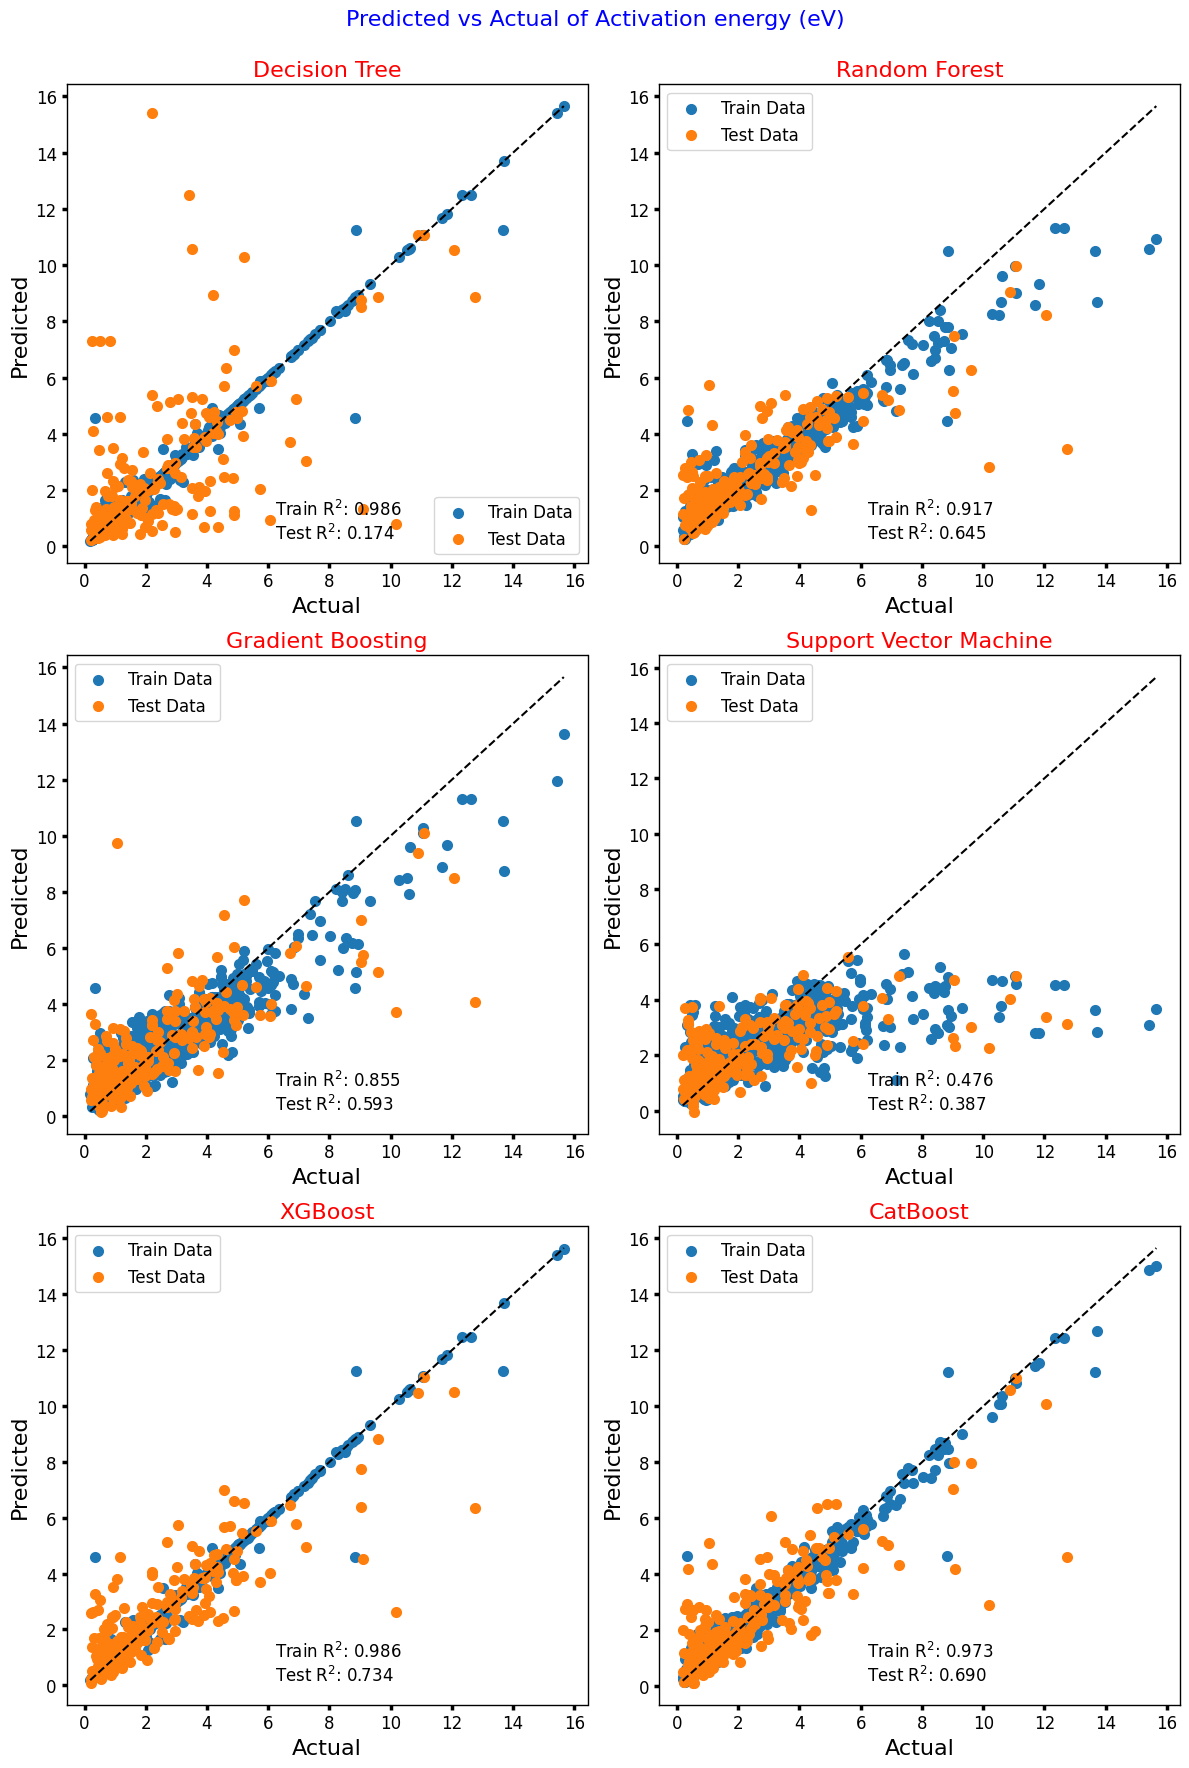

In [2]:
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

# Load data
df = pd.read_csv('data_training.csv')
# Split data into features (X) and target (y)
X = df.drop(columns=['formula','Ea_1D','Ea_2D','Ea_3D'])  
y = df['Ea_3D']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models
models = [
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('Support Vector Machine', SVR()),
    ('XGBoost', xgb.XGBRegressor(max_depth=5, learning_rate=0.1, n_estimators=500, n_jobs=-1)),
    ('CatBoost', CatBoostRegressor(max_depth=5, learning_rate=0.1, n_estimators=500, thread_count=-1))
]

results = []
for name, model in models:
    model.fit(X_train_scaled, y_train)
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    mse_train = mean_squared_error(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
    
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
    
    results.append((name, mse_train, mae_train, r2_train, mape_train, mse_test, mae_test, r2_test, mape_test))

# Save training and test data
pd.DataFrame(results, columns=['Model', 'Train MSE', 'Train MAE', 'Train R2', 'Train MAPE', 'Test MSE', 'Test MAE', 'Test R2', 'Test MAPE']).to_csv('results.csv', index=False)

# Plot results
fig, axs = plt.subplots(3, 2, figsize=(12, 18))  # Changed to 3 rows, 2 columns
for i, (name, _, _, _, _, _, _, _, _) in enumerate(results):
    ax = axs[i // 2, i % 2]
    model, model_obj = models[i]
    model_obj.fit(X_train_scaled, y_train)
    y_train_pred = model_obj.predict(X_train_scaled)
    y_test_pred = model_obj.predict(X_test_scaled)
    ax.scatter(y_train, y_train_pred, label='Train Data', linewidth=2)
    ax.scatter(y_test, y_test_pred, label='Test Data', linewidth=2)
    ax.set_xlabel('Actual', fontsize=16)   
    ax.set_ylabel('Predicted', fontsize=16)   
    ax.set_title(f'{name}', fontsize=16, color='red') 
    ax.legend(prop={'size': 12})  
    ax.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())], [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())], 'k--', label='y=x')
    ax.text(0.4, 0.05, f'Train R$^2$: {r2_score(y_train, y_train_pred):.3f}\nTest R$^2$: {r2_score(y_test, y_test_pred):.3f}', transform=ax.transAxes, fontsize=12)  
    ax.tick_params(axis='both', which='major', labelsize=12, width=2.5)
    ax.spines['top'].set_linewidth(1)   
    ax.spines['right'].set_linewidth(1)   
    ax.spines['bottom'].set_linewidth(1)  
    ax.spines['left'].set_linewidth(1)   
 
plt.tight_layout(rect=[0, 0, 1, 0.96])
fig.suptitle('Predicted vs Actual of Activation energy (eV)', fontsize=16, color='blue')
plt.savefig('Ea3_pred_vs_actual_all_models.png', dpi=300)
plt.show()